In [39]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path as path
import urllib.request

In [52]:
file = 'Sigmoid.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'

if not path.exists(file):
    urllib.request.urlretrieve(url, file)
    Path_ = file
else:
    Path_ = file

Data = pd.read_csv(Path_,sep=',')
x = np.float64(Data['x'])
y = np.float64(Data['y'])
n = y.size
h = 0.01

In [53]:
def fun(x, t0,t1,t2):
    
    res = t0/ (t1 + np.exp(-t2*x))
    
    return res
def costo(x,y, t1,t2,t3):
    chi = 0
    
    for i in range(n):
        chi += (y[i] - fun(x[i],t1,t2,t3))**2
    return chi 
def Derivadas(x,y,t0,t1,t2):
    J = np.zeros(3)
    
    J[0] = ( costo(x,y,t0+h,t1,t2) - costo(x,y,t0-h,t1,t2))/(2*h)
    J[1] = ( costo(x,y,t0,t1+h,t2) - costo(x,y,t0,t1-h,t2))/(2*h)
    J[2] = ( costo(x,y,t0,t1,t2+h) - costo(x,y,t0,t1,t2-h))/(2*h)
    return J
def Descenso( teta, lr, itmax, error):
    it = 0
    d = 1
    while d > error and it < itmax:
        x0 = Derivadas(x,y,teta[0],teta[1],teta[2])
        
        teta = teta - lr*x0
        
        d = np.linalg.norm(teta-optimize.curve_fit(fun,x,y)[0])
        
        it += 1
        

    return teta, d,it

In [56]:
print('Puede demorarse unos segundos...')
teta0 = np.array([1,1,1])
p = Descenso(teta0,5e-4,2e4,1e-2)

t0 = p[0][0]
t1 = p[0][1]
t2 = p[0][2]

chi = costo(x,y,t0,t1,t2)

print('Los puntos que mejor se ajustan al modelo son: \n', str(t0)+'\n',str(t1)+'\n',str(t2)+'\n')


Puede demorarse unos segundos...
Los puntos que mejor se ajustan al modelo son: 
 4.394141971870481
 0.9737879524137685
 2.789338222493078



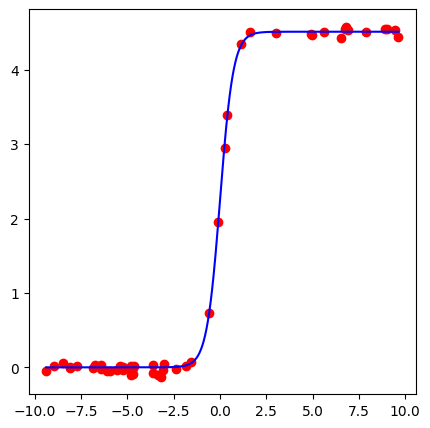

In [55]:
x1 = np.linspace(min(x),max(x),500)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y,c='r')
plt.plot(x1,fun(x1,t0,t1,t2),c='b')